In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from traitlets import observe

In [3]:
df = pd.read_csv('/home/asif/Code/Godhuli/superstore_sales_analysis/Data/superstore.csv',encoding='latin1')

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# 1. Data Understanding and Preparation

#### 1.1 Data Exploration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

<Axes: >

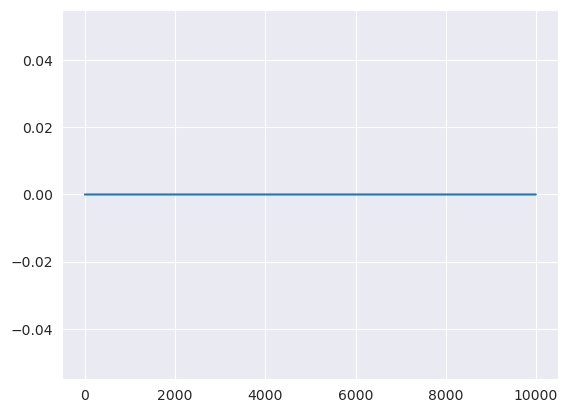

In [6]:
df.isnull().sum(axis=1).plot()

No Null values

#### 1.2 Data Cleaning 

In [7]:
# Dropping Row ID
df = df.drop(columns=['Row ID'])

In [8]:
# Checking for Duplicates 
if df.duplicated().sum() > 0:
    print('Duplicate exits')
else:
    print("No duplicates")

Duplicate exits


In [9]:
duplicates = df[df.duplicated(keep=False)]
duplicates

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3405,US-2014-150119,4/23/2014,4/27/2014,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588
3406,US-2014-150119,4/23/2014,4/27/2014,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


In [10]:
# Dropping Duplicate row
df.drop_duplicates(inplace=True)

#### Converting Data Types

In [11]:
data_columns = ['Order Date', 'Ship Date']
for col in data_columns:
    df[col] = pd.to_datetime(df[col])

In [12]:
df['Customer ID'] = df['Customer ID'].astype('category')

#### 1.3 Feature Engineering
* Creating New Feature : Order Year and Month

In [13]:
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month

In [16]:
def investigate_sales_discount(df):
    print("Sample of Sales and Discount:")
    print(df[['Sales', 'Discount', 'Quantity']].head())
    
    print("\nDiscount range:")
    print(df['Discount'].describe())
    
    print("\nCalculating potential Revenue:")
    df['Potential Revenue'] = df['Sales'] * (1-df['Discount'])
    print(df[['Sales', 'Discount', 'Potential Revenue']].head())
    
    print("\nComparing Sales and Potential Revenue:")
    print("Total Sales: ", df['Sales'].sum())
    print("Total Potential Revenue: ", df['Potential Revenue'].sum())
    
investigate_sales_discount(df)
    
    

Sample of Sales and Discount:
      Sales  Discount  Quantity
0  261.9600      0.00         2
1  731.9400      0.00         3
2   14.6200      0.00         2
3  957.5775      0.45         5
4   22.3680      0.20         2

Discount range:
count    9993.000000
mean        0.156188
std         0.206457
min         0.000000
25%         0.000000
50%         0.200000
75%         0.200000
max         0.800000
Name: Discount, dtype: float64

Calculating potential Revenue:
      Sales  Discount  Potential Revenue
0  261.9600      0.00         261.960000
1  731.9400      0.00         731.940000
2   14.6200      0.00          14.620000
3  957.5775      0.45         526.667625
4   22.3680      0.20          17.894400

Comparing Sales and Potential Revenue:
Total Sales:  2296919.4883000003
Total Potential Revenue:  1974421.7655590002


###### Sales column is likely representing Revenue (or Net Sales).
###### The Discount column shows the rate of discount applied to the original price

In [17]:
# Renaming Sales column 
df.rename(columns={'Sales':'Total Revenue'}, inplace=True)


* Calculating Customer Lifetime Value (CLV)

In [21]:
# Calculate customer lifespan
def calculate_average_lifespan(df):
    lifespan = df.groupby('Customer ID')['Order Date'].agg(['min', 'max'])
    lifespan['Lifespan (days)'] = (lifespan['max'] - lifespan['min']).dt.days
    average_lifespan = lifespan['Lifespan (days)'].mean()
    average_lifespan_years = average_lifespan / 365  
    return average_lifespan_years

ave_lifespan = calculate_average_lifespan(df)
print(f"\nAverage Lifespan: {ave_lifespan:.2f} years")


Average Lifespan: 2.74 years


/tmp/ipykernel_272842/545695867.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lifespan = df.groupby('Customer ID')['Order Date'].agg(['min', 'max'])


In [22]:
avg_order_value = df.groupby('Customer ID')['Total Revenue'].mean()
purchase_frequency = df.groupby('Customer ID')['Order ID'].count()

clv = avg_order_value * purchase_frequency * ave_lifespan
clv = clv.rename('CLV')
df = df.merge(clv, on='Customer ID', how='left')

/tmp/ipykernel_272842/1410116754.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_order_value = df.groupby('Customer ID')['Total Revenue'].mean()
/tmp/ipykernel_272842/1410116754.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  purchase_frequency = df.groupby('Customer ID')['Order ID'].count()


In [25]:
df.head(10)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Category,Sub-Category,Product Name,Total Revenue,Quantity,Discount,Profit,Order Year,Order Month,CLV
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,3146.243079
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,3146.243079
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,3066.005363
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,7127.853161
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,7127.853161
5,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,2014,6,17131.961550
6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656,2014,6,17131.961550
7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152,2014,6,17131.961550
8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825,2014,6,17131.961550
9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700,2014,6,17131.961550


In [24]:
df.drop('Potential Revenue', axis=1, inplace=True)

# 2. Exploratory Analysis
* Visualizations: Sales Trends

In [27]:
# Types of customers

types_of_customers = df['Segment'].unique()

print(types_of_customers)

['Consumer' 'Corporate' 'Home Office']


In [30]:
number_of_customers = df['Segment'].value_counts().reset_index()
number_of_customers = number_of_customers.rename(columns={'Segment': 'Type of Customers'})

In [31]:
print(number_of_customers)

  Type of Customers  count
0          Consumer   5191
1         Corporate   3020
2       Home Office   1782


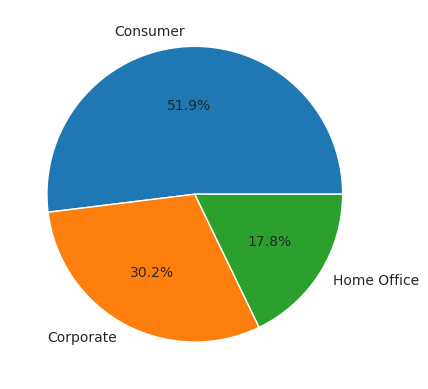

In [40]:
plt.pie(number_of_customers['count'], labels=number_of_customers['Type of Customers'], autopct='%1.1f%%');

  Type of Customers  Total Revenue
0          Consumer   1.161401e+06
1         Corporate   7.061464e+05
2       Home Office   4.293718e+05


<BarContainer object of 3 artists>

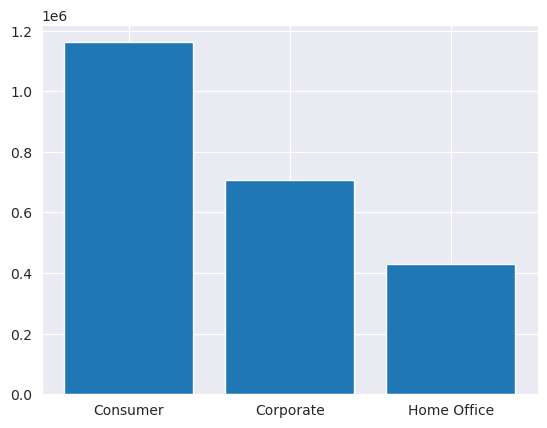

In [41]:
sales_per_segment = df.groupby('Segment')['Total Revenue'].sum().reset_index()
sales_per_segment = sales_per_segment.rename(columns={'Segment': 'Type of Customers'})

print(sales_per_segment)

plt.bar(sales_per_segment['Type of Customers'], sales_per_segment['Total Revenue'])

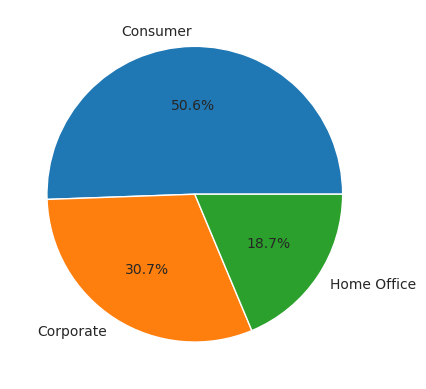

In [42]:
plt.pie(sales_per_segment['Total Revenue'], labels=sales_per_segment['Type of Customers'], autopct='%1.1f%%');

       Segment       Profit
0     Consumer  134119.2092
1    Corporate   91979.1340
2  Home Office   60310.7373


<BarContainer object of 3 artists>

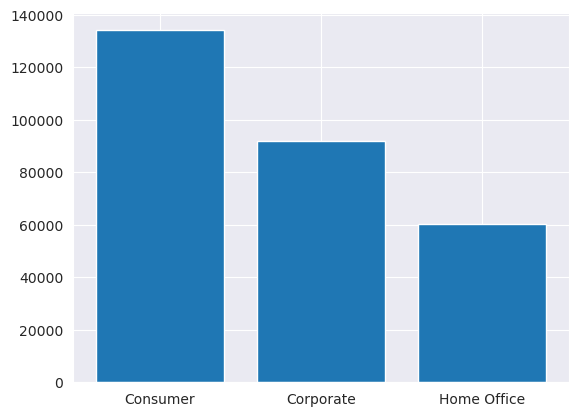

In [43]:
profit_per_segment = df.groupby('Segment')['Profit'].sum().reset_index()

print(profit_per_segment)
plt.bar(profit_per_segment['Segment'], profit_per_segment['Profit'])

In [56]:
customer_clv = df.groupby('Customer Name')['CLV'].sum().reset_index()
customer_high_CLV = customer_clv.sort_values(by='CLV', ascending=False)
print(customer_high_CLV.head(10))

     Customer Name           CLV
441   Ken Lonsdale  1.125858e+06
686    Sean Miller  1.028807e+06
689    Seth Vernon  1.005321e+06
312      Greg Tran  9.388048e+05
387       John Lee  9.125507e+05
249   Edward Hooks  9.036518e+05
671   Sanjit Chand  8.521169e+05
169    Clay Ludtke  8.343805e+05
6    Adrian Barton  7.927954e+05
622   Raymond Buch  7.452522e+05


       Segment           CLV
0     Consumer  5.116180e+07
1    Corporate  2.973952e+07
2  Home Office  1.743124e+07


<BarContainer object of 3 artists>

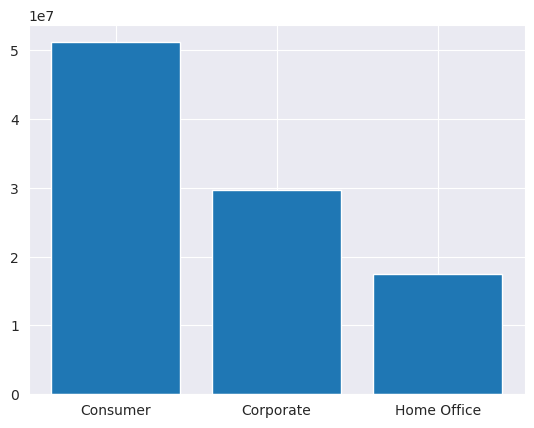

In [57]:
segment_clv = df.groupby('Segment')['CLV'].sum().reset_index()
print(segment_clv)
plt.bar(segment_clv['Segment'], segment_clv['CLV'])

#### The consumer segment significantly outperforms other segments in terms of fianacial metrics:
* It contributes the most to overall Revenue, reflecting its dominant role in driving sales.
* The segment has the Highest Customer Lifetime Value (CLV).
* It also earns highest profits, further confirming its importance to the business's profitability.


In [65]:
# Customer Order Frequency
customer_order_frequency = df.groupby(['Customer ID', 'Customer Name', 'Segment'], observed=True)['Order ID'].count().reset_index()

In [67]:
customer_order_frequency.rename(columns={'Order ID': 'Total Orders'}, inplace=True)
repeat_customers = customer_order_frequency[customer_order_frequency['Total Orders'] >= 1]
repeat_customer_sorted = repeat_customers.sort_values(by='Total Orders', ascending=False)
print(repeat_customer_sorted.head(10).reset_index(drop=True))

  Customer ID        Customer Name      Segment  Total Orders
0    WB-21850        William Brown     Consumer            37
1    PP-18955           Paul Prost  Home Office            34
2    JL-15835             John Lee     Consumer            34
3    MA-17560         Matt Abelman  Home Office            34
4    SV-20365          Seth Vernon     Consumer            32
5    JD-15895     Jonathan Doherty    Corporate            32
6    CK-12205  Chloris Kastensmidt     Consumer            32
7    EH-13765         Edward Hooks    Corporate            32
8    EP-13915           Emily Phan     Consumer            31
9    ZC-21910     Zuschuss Carroll     Consumer            31


In [71]:
# Top Spenders 

customer_sales = df.groupby(['Customer ID', 'Customer Name', 'Segment'],observed=True)['Total Revenue'].sum().reset_index()

In [72]:
top_spenders = customer_sales.sort_values(by='Total Revenue', ascending=False)
print(top_spenders.head(10).reset_index(drop=True))

  Customer ID       Customer Name      Segment  Total Revenue
0    SM-20320         Sean Miller  Home Office      25043.050
1    TC-20980        Tamara Chand    Corporate      19052.218
2    RB-19360        Raymond Buch     Consumer      15117.339
3    TA-21385        Tom Ashbrook  Home Office      14595.620
4    AB-10105       Adrian Barton     Consumer      14473.571
5    KL-16645        Ken Lonsdale     Consumer      14175.229
6    SC-20095        Sanjit Chand     Consumer      14142.334
7    HL-15040        Hunter Lopez     Consumer      12873.298
8    SE-20110        Sanjit Engle     Consumer      12209.438
9    CC-12370  Christopher Conant     Consumer      12129.072


In [78]:
top_customers = top_spenders.head(10)

/tmp/ipykernel_272842/1134946657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_customers['Cumulative Revenue'] = top_customers['Total Revenue'].cumsum()
/tmp/ipykernel_272842/1134946657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_customers['Cumulative Percentage'] = 100 * top_customers['Cumulative Revenue'] / top_customers['Total Revenue'].sum()


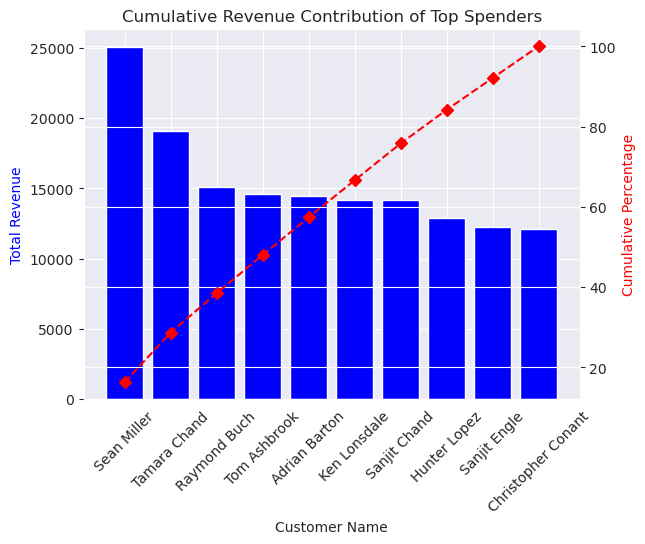

In [80]:
top_customers['Cumulative Revenue'] = top_customers['Total Revenue'].cumsum()
top_customers['Cumulative Percentage'] = 100 * top_customers['Cumulative Revenue'] / top_customers['Total Revenue'].sum()

fig, ax1 = plt.subplots()

ax1.bar(top_customers['Customer Name'], top_customers['Total Revenue'], color='blue')
ax1.set_xlabel('Customer Name')
ax1.set_ylabel('Total Revenue', color='blue')
ax1.tick_params(axis='x', rotation=45)

ax2 = ax1.twinx()
ax2.plot(top_customers['Customer Name'], top_customers['Cumulative Percentage'],color='red', marker='D', linestyle='--')
ax2.set_ylabel('Cumulative Percentage', color='red')

plt.xticks(rotation=90)

plt.title('Cumulative Revenue Contribution of Top Spenders')
plt.show();

In [84]:
# Ship Mode

types_of_ship_modes = df['Ship Mode'].unique()
print(types_of_ship_modes)

['Second Class' 'Standard Class' 'First Class' 'Same Day']


In [93]:
shipping_mode = df['Ship Mode'].value_counts().reset_index()
shipping_mode = shipping_mode.rename(columns={ 'index': 'Use Frequency','Ship Mode': 'Mode of Shipment', 'count': 'Use Frequency'})
print(shipping_mode)

  Mode of Shipment  Use Frequency
0   Standard Class           5967
1     Second Class           1945
2      First Class           1538
3         Same Day            543


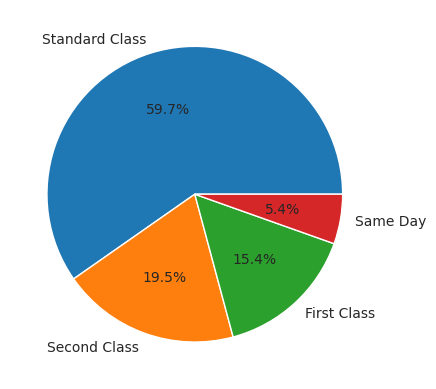

In [94]:
plt.pie(shipping_mode['Use Frequency'], labels=shipping_mode['Mode of Shipment'], autopct='%1.1f%%');

In [96]:
state = df['State'].value_counts().reset_index()
state = state.rename(columns={'index': 'State', 'count': 'Number of Customers'})
print(state.head(20))

             State  Number of Customers
0       California                 2001
1         New York                 1128
2            Texas                  985
3     Pennsylvania                  587
4       Washington                  506
5         Illinois                  492
6             Ohio                  468
7          Florida                  383
8         Michigan                  255
9   North Carolina                  249
10         Arizona                  224
11        Virginia                  224
12         Georgia                  184
13       Tennessee                  183
14        Colorado                  182
15         Indiana                  149
16        Kentucky                  139
17   Massachusetts                  135
18      New Jersey                  130
19          Oregon                  124


In [97]:
city = df['City'].value_counts().reset_index()
print(city.head(20))

             City  count
0   New York City    915
1     Los Angeles    747
2    Philadelphia    537
3   San Francisco    510
4         Seattle    428
5         Houston    377
6         Chicago    314
7        Columbus    221
8       San Diego    170
9     Springfield    163
10         Dallas    157
11   Jacksonville    125
12        Detroit    115
13         Newark     95
14       Richmond     90
15        Jackson     82
16       Columbia     81
17         Aurora     68
18        Phoenix     63
19     Long Beach     61


In [100]:
state_sales = df.groupby(['State'],observed=True)['Total Revenue'].sum().reset_index()
top_state_sales = state_sales.sort_values(by='Total Revenue', ascending=False)
print(top_state_sales.head(10).reset_index(drop=True))

          State  Total Revenue
0    California    457687.6315
1      New York    310876.2710
2         Texas    170188.0458
3    Washington    138641.2700
4  Pennsylvania    116511.9140
5       Florida     89473.7080
6      Illinois     80166.1010
7          Ohio     77976.7640
8      Michigan     76269.6140
9      Virginia     70636.7200


In [99]:
city_sales = df.groupby(['City'],observed=True)['Total Revenue'].sum().reset_index()
top_city_sales = city_sales.sort_values(by='Total Revenue', ascending=False)
print(top_city_sales.head(20).reset_index(drop=True))

             City  Total Revenue
0   New York City    256368.1610
1     Los Angeles    175851.3410
2         Seattle    119540.7420
3   San Francisco    112669.0920
4    Philadelphia    109077.0130
5         Houston     64504.7604
6         Chicago     48539.5410
7       San Diego     47521.0290
8    Jacksonville     44713.1830
9     Springfield     43054.3420
10        Detroit     42446.9440
11       Columbus     38424.8710
12         Newark     28576.1190
13       Columbia     25283.3240
14      Lafayette     25036.2000
15        Jackson     24963.8580
16    San Antonio     21843.5280
17     Burlington     21668.0820
18      Arlington     20214.5320
19         Dallas     20131.9322


In [101]:
state_city_sales = df.groupby(['State', 'City'],observed=True)['Total Revenue'].sum().reset_index()
print(state_city_sales.head(10))

     State           City  Total Revenue
0  Alabama         Auburn       1766.830
1  Alabama        Decatur       3374.820
2  Alabama       Florence       1997.350
3  Alabama         Hoover        525.850
4  Alabama     Huntsville       2484.370
5  Alabama         Mobile       5462.990
6  Alabama     Montgomery       3722.730
7  Alabama     Tuscaloosa        175.700
8  Arizona       Avondale        946.808
9  Arizona  Bullhead City         22.288


In [103]:
products = df['Category'].unique()
print(products)

['Furniture' 'Office Supplies' 'Technology']


In [104]:
product_subcategory = df['Sub-Category'].unique()
print(product_subcategory)

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [105]:
subcategory_count = df.groupby('Category')['Sub-Category'].nunique().reset_index()
subcategory_count = subcategory_count.sort_values(by='Sub-Category', ascending=False)
print(subcategory_count)

          Category  Sub-Category
1  Office Supplies             9
0        Furniture             4
2       Technology             4


In [106]:
subcategory_count_sales = df.groupby(['Category', 'Sub-Category'],observed=True)['Total Revenue'].sum().reset_index()
subcategory_count_sales = subcategory_count_sales.sort_values(by='Total Revenue', ascending=False)
print(subcategory_count_sales)

           Category Sub-Category  Total Revenue
16       Technology       Phones    330007.0540
1         Furniture       Chairs    328167.7310
11  Office Supplies      Storage    223843.6080
3         Furniture       Tables    206965.5320
6   Office Supplies      Binders    203412.7330
15       Technology     Machines    189238.6310
13       Technology  Accessories    167380.3180
14       Technology      Copiers    149528.0300
0         Furniture    Bookcases    114879.9963
4   Office Supplies   Appliances    107532.1610
2         Furniture  Furnishings     91705.1640
10  Office Supplies        Paper     78479.2060
12  Office Supplies     Supplies     46673.5380
5   Office Supplies          Art     27118.7920
7   Office Supplies    Envelopes     16476.4020
9   Office Supplies       Labels     12486.3120
8   Office Supplies    Fasteners      3024.2800


In [107]:
product_category = df.groupby(['Category'], observed=True)['Total Revenue'].sum().reset_index()
top_product_category = product_category.sort_values(by='Total Revenue', ascending=False)
print(top_product_category)

          Category  Total Revenue
2       Technology    836154.0330
0        Furniture    741718.4233
1  Office Supplies    719047.0320


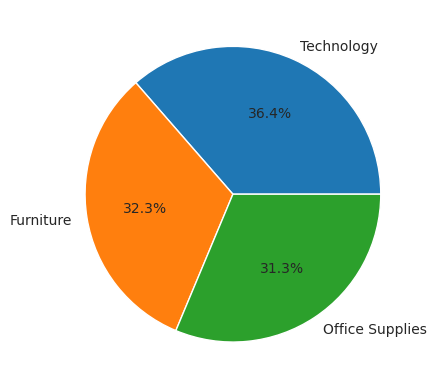

In [108]:
plt.pie(top_product_category['Total Revenue'], labels=top_product_category['Category'], autopct='%1.1f%%');

<BarContainer object of 17 artists>

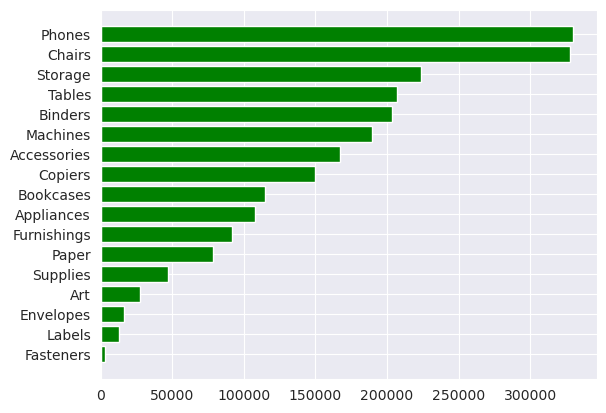

In [111]:
subcategory_count_sales = subcategory_count_sales.sort_values(by='Total Revenue', ascending=True)
plt.barh(subcategory_count_sales['Sub-Category'], subcategory_count_sales['Total Revenue'], color='green')

In [112]:
yearly_sales = df.groupby(['Order Year'], observed=True)['Total Revenue'].sum().reset_index()
print(yearly_sales)

   Order Year  Total Revenue
0        2014    483966.1261
1        2015    470532.5090
2        2016    609205.5980
3        2017    733215.2552


<BarContainer object of 4 artists>

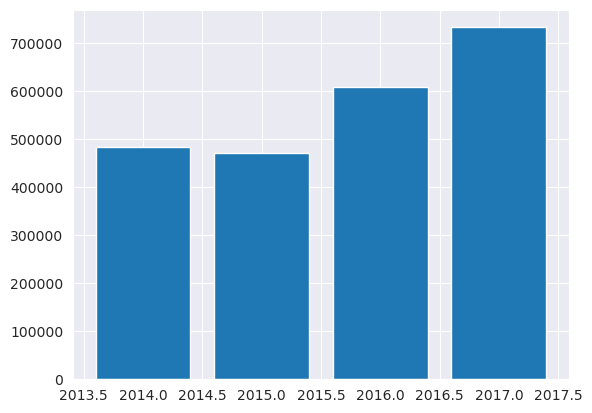

In [113]:
plt.bar(yearly_sales['Order Year'], yearly_sales['Total Revenue'],)

In [115]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Total Revenue', 'Quantity', 'Discount', 'Profit', 'Order Year',
       'Order Month', 'CLV'],
      dtype='object')